In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10. N차원 배열(Numpy 배열) 다루기(1절~3절)</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable)
- 2차원 배열은 행렬 개념으로 이해할 수 있음
- numpy 패키지를 이용(c언어로 구현된 고성능 수치 계산 패키지)
# 1. Numpy Package

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [4]:
# np.arange(from, stop, by) : from부터 stop 앞까지 by씩 증가하는 1차원 배열 생성
a = np.arange(15) # 0부터 15 앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1.배열 속성

In [6]:
from numpy import arange
a = arange(15,
          # dtype=np.int32 (default) : 32비트가 4바이트(d.h. 8비트가 1바이트)
          ).reshape(3, 5) # 3행 5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [7]:
type(a) # a 변수의 타입

numpy.ndarray

In [8]:
a.dtype # data type : a 배열의 요소들의 type

dtype('int32')

In [9]:
a.dtype.name

'int32'

In [10]:
a.itemsize # a 배열 안의 한 요소의 byte size

4

In [11]:
a.ndim # 축수(차원 수)

2

In [12]:
a.size # 배열 요소의 개수

15

In [13]:
a.shape # 배열의 구조(3행 5열)

(3, 5)

In [14]:
print('shape 조정 전 a\n', a)
a.shape = (5, 3) # NICHT empfehlenswert!
print('shape 조정 후 a\n', a) # comma 없으면 배열

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


 ## 1.2.배열 타입 변경


In [15]:
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
a.size

12

In [17]:
a.dtype

dtype('int32')

In [18]:
a.itemsize

4

In [21]:
#  배열 요소의 타입을 수정
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
a.astype('int64') # a.astype(np.int64) 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [24]:
a = a.astype('int64') # 할당 필요!

In [25]:
a.itemsize

8

In [26]:
a.size

12

In [27]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [28]:
a.ravel() # flatten된 배열을 return 배열 자체는 수정 안 함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [29]:
a.flatten() # 함수의 결과를 return하고 배열 자체는 수정 안 함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3.배열 저장
- pkl(객체, 배열, ML모델 저장), npy(Numpy 전용 포맷, io속도 개선) 

In [30]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [33]:
# 실행에 소요된 시간을 물어보는 매직 명령어 (셀 가장 위에 놓아야 하고 그 행에는 주석도 달 수 없음)
%%time
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

CPU times: total: 0 ns
Wall time: 0 ns


In [34]:
%%time
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)
loaded_a

CPU times: total: 0 ns
Wall time: 1 ms


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [36]:
%%time
np.save('data/ch10.npy', a) # npy 파일은 무조건 save함수를 사용해서 저장!

CPU times: total: 0 ns
Wall time: 1.26 ms


In [37]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 13 ms


# 2. Numpy 배열
- array()함수를 사용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타 함수들 : arange (<< array range), ones, zeros, full, empty, linspace, ...
- 랜덤 값을 갖는 함수들 : np.random.~
## 2.1.array()함수로 Numpy 배열 만들기
    - array(obj, [dtype='int16'/np.int16], copy=T/F)

In [39]:
a = np.array([2, 4, 6], dtype=np.int16) # 정수의 default type은 int32
a

array([2, 4, 6], dtype=int16)

In [40]:
a[0], a[1], a[2]

(2, 4, 6)

In [41]:
for i in a:
    print(i, end='\t')

2	4	6	

In [44]:
b = np.array([[1.5, 2.3],
              [4, 5]]) # 배열은 동일 자료형의 집합 : 정수->실수->문자
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [45]:
b[0][1], b[0,1] #2차원 인덱싱 [axis0행, axis1열]

(2.3, 2.3)

In [47]:
print(b.dtype) # 정수 기본 타입은 int32, 실수 기본 타입은 float64
print(b.itemsize)

float64
8


In [49]:
b = b.astype(np.float32) # 함수의 결과를 return하면 b는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [50]:
print(b.dtype) # 정수 기본 타입은 int32, 실수 기본 타입은 float64
print(b.itemsize)

float32
4


In [52]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() # 개행

1.5	2.3	
4.0	5.0	


In [53]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i, j, item, b[i, j]), end='\t')
    print() # i → 행 번호 (0행, 1행, 2행 …)
            # row → 그 행에 들어있는 값들의 배열
            # j → 열 번호
            # item → 그 위치의 값

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [55]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int16)

In [56]:
b[0,1] # 인덱싱 시 없는 인덱싱 시 에러 발생

2

In [62]:
print('0~1행, 1~2열 :\n', b[0:2, 1:3]) # 2,3,7,9
print('2행 모두(1차원) :', b[2, :], b[2]) # 11,12,13,14,15 (특정 행의 모든 열을 추출할 경우, 열 생략 가능)
print('2행 모두(2차원) :', b[2:3, :], b[2:3]) # 11,12,13,14,15 (특정 행의 모든 열을 추출할 경우, 열 생략 가능)
print('4열(마지막 열) 모두(1차원) :', b[:, 4], b[..., 4], b[:, -1]) # 5,10,15 (특정 열, 모든 행을 추출할 경우)
print('4열(마지막 열) 모두(2차원) :', b[:, 4:], b[..., 4:], b[:, -1:], b[..., -1:]) # 5,10,15 (특정 열, 모든 행을 추출할 경우)
print('2행 0~3열(2차원) :', b[2:3, 0:-1])
print('마지막 열 제외 :\n', b[:, :-1]) # 면, 행, 열의 3차원이면 면이 axis0, 행이 axis1, 열이 axis2

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행 모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행 모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열(마지막 열) 모두(1차원) : [ 5 10 15] [ 5 10 15] [ 5 10 15]
4열(마지막 열) 모두(2차원) : [[ 5]
 [10]
 [15]] [[ 5]
 [10]
 [15]] [[ 5]
 [10]
 [15]] [[ 5]
 [10]
 [15]]
2행 0~3열(2차원) : [[11 12 13 14]]
마지막 열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [63]:
# 스칼라 변수
a = 10
copy_a = a # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")

a=10, 복제본10
a=10, 복제본-1


In [64]:
# 데이터 구조
a = [0, 1]
copy_a = a.copy() # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본{copy_a}")

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [66]:
# numpy 배열
import numpy as np
c = np.array([ [1,2], [3,4] ])
# d = c # assign != copy=False
# d = np.array(c, copy=True) # Numpy 배열에서의 깊은 복사
d = c.copy() # Numpy 배열에서의 깊은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1786899759920 1786899761552


## 2.2.기본값이 있는 배열 만들기
- np.zeros(tuple) : 요소들이 다 0
- np.ones(tuple) : 요소들이 다 1
- np.full(tuple, 기본값) : 요소들이 다 두번째 매개변수(==기본값)
- np.empty(tuple) : 초기 내용은 임의 값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64 (dtype 속성 따로 지정 가능)

In [68]:
np.zeros((3, 5)) # np.zeros((3,)) #3열짜리 1차원 float64 배열(요소들은 다 0)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
import numpy as np
y = np.zeros((3)) # 1차원 배열
y

array([0., 0., 0.])

In [69]:
x = np.zeros((3,)) # 2차원 배열
x

array([0., 0., 0.])

In [72]:
x = np.zeros((2, 5), dtype = np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [74]:
np.ones((2, 5), dtype = np.uint8) # uint : 음수가 필요 없는 데이터(예: 이미지 픽셀 값 0~255)를 다룰 때 메모리를 아끼기 위해 사용. 
# uint8은 특히 이미지 처리(OpenCV, Pillow 등) 에서 매우 흔함.

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [77]:
np.full((2,3), -1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

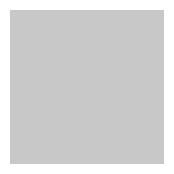

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize = (가로, 세로)
img = np.full((28,28), 200, dtype=np.uint8) # unsigned integer
plt.imshow(img, cmap='gray', vmin=0, vmax=255) # imshow: image show; cmap: colour map; vmin/vamx: value min/max
plt.axis('off') #축 없애기
plt.show()

In [91]:
np.empty((3, 2)) # 초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3.랜덤값을 갖는 배열 만들기
- np.random.random(tuple) : 0부터 1미만의 균등분포(같은 확률)를 갖는 n차원 랜덤값 배열 발생
- np.random.uniform(low=0.0, high=1.0, size=tuple) : low부터 high미만의 n차원의 균등분포 랜덤값 배열 발생
- np.random.normal(loc=0.0, scale=1.0, size=tuple) : 평균loc과 표준편차 scale을 갖는 n차원의 정규분포 랜덤값 배열 발생


- np.random.rand(n) : 0부터 1미만의 균등분포를 갖는 1차원 랜덤값 배열 발생(난수 1개)
- np.random.randn(n) : 평균0, 표준편차1의 표준정규분포를 갖는 1차원 랜덤값 배열 발생
 
cf) np.random.randint([from], to) : from(기본값=0)부터 to 미만의 정수 난수 1개 발생==random.randint(from, to-1)

In [92]:
np.random.random((2, 3))

array([[0.25000941, 0.5629254 , 0.9180612 ],
       [0.27911145, 0.92804025, 0.08591715]])

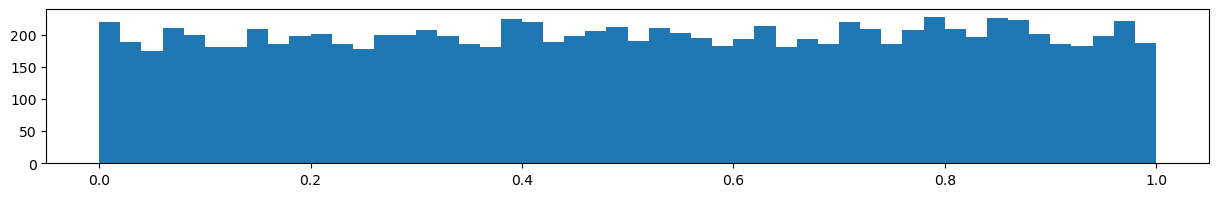

In [105]:
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프의 크기
plt.hist(x, bins=50)
plt.show()

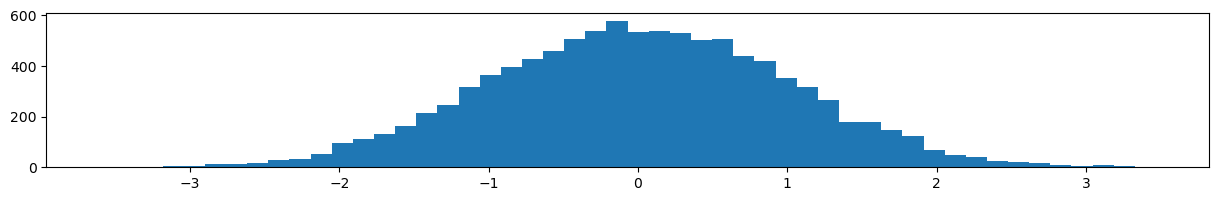

In [104]:
x = np.random.randn(10000) # 정규분포(표준정규분포는 평균 0, 표준편차가 1인 정규분포)
plt.figure(figsize=(15,2)) # 그래프의 크기
plt.hist(x, bins=50)
plt.show()

In [106]:
# 1차원 난수 배열
print(np.random.rand(3)) #균등분포
print(np.random.randn(3)) #정규분포

[0.53800929 0.73994575 0.96875491]
[-0.47055384  0.23882706  0.32091201]


In [107]:
# 2차원 난수 배열
np.random.random((2, 5)) # 2행 5열짜리 0~1미만 균등분포 난수 배열

array([[0.38806949, 0.97045887, 0.27570226, 0.38306247, 0.06209003],
       [0.92711977, 0.46659958, 0.38053076, 0.11151242, 0.30647449]])

In [108]:
np.random.uniform(low=-2, high=2, size=(2, 5)) # 2행 5열짜리 -2~2미만의 균등분포 난수 배열

array([[ 0.51955854, -1.50949349, -1.12568295,  1.92034515, -1.48316317],
       [-0.64195942, -0.2612091 , -1.13099508, -0.82558208, -0.64004118]])

In [109]:
np.random.normal(size=(2, 5)) # 2행 5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[ 0.75715793, -1.01858752, -1.13470653,  0.97482394, -0.22288694],
       [ 1.32271163,  0.09547938,  1.05797782,  0.49511889,  0.69650507]])

In [110]:
np.random.normal(loc=-1, scale=1, size=(2, 5)) # 2행 5열짜리 정규분포(평균-1, 표준편차1) 난수 배열

array([[-2.14991517, -0.90375285, -1.91714843, -0.65648529, -0.43091083],
       [-1.30590356,  0.45723171,  0.63742704, -1.31703045,  0.42144524]])

## 2.4.연속된 값을 갖는 1차원 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to 앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to까지(to 포함) num개 숫자들을 1차원 배열로 생성

In [112]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [114]:
np.arange(0, 2.0, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [116]:
np.linspace(0, 5, 5) # linear space

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [127]:
# linspace : 특정한 범위의 수들을 많이 생성할 때 사용
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

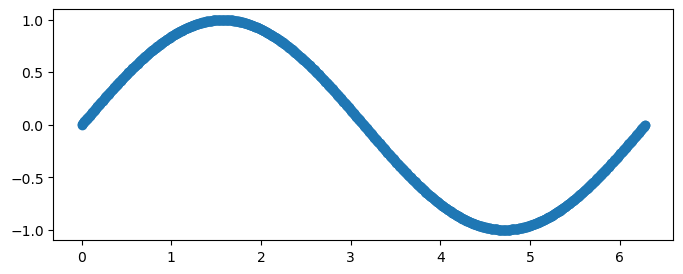

In [128]:
plt.figure(figsize=(8, 3))
plt.scatter(x, y) # scatter : 점 그래프
plt.show()

## 2.5.배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가!
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고 실행결과가 없으면 배열이 수정됨

In [129]:
t = np.random.random((2, 3))
t

array([[0.54923628, 0.9945969 , 0.67473955],
       [0.11819295, 0.655786  , 0.21748727]])

In [130]:
a = np.round(t*10) # np.round() : 반올림
a

array([[ 5., 10.,  7.],
       [ 1.,  7.,  2.]])

In [132]:
a = a.astype(np.int16)

In [133]:
a

array([[ 5, 10,  7],
       [ 1,  7,  2]], dtype=int16)

In [134]:
a.reshape(3, 2)

array([[ 5, 10],
       [ 7,  1],
       [ 7,  2]], dtype=int16)

In [137]:
a = a.reshape(-1, 1) # -1이 주어지면 해당 차원의 크기가 자동 계산됨

In [138]:
a

array([[ 5],
       [10],
       [ 7],
       [ 1],
       [ 7],
       [ 2]], dtype=int16)

In [139]:
a.reshape(3, -1)

array([[ 5, 10],
       [ 7,  1],
       [ 7,  2]], dtype=int16)

In [140]:
a.resize(2, 3) # 실행 결과가 출력되지 않으면 a가 바뀐 것. 매개변수는 튜플로 넣어도 무방하나 그렇게 별로 안 씀

In [141]:
a

array([[ 5, 10,  7],
       [ 1,  7,  2]], dtype=int16)

In [142]:
# 전치행렬(transponierte Matrix) : x행 y열 -> y행 x열)
a.T # a의 전치행렬

array([[ 5,  1],
       [10,  7],
       [ 7,  2]], dtype=int16)

In [143]:
a.transpose() # a의 전치행렬 

array([[ 5,  1],
       [10,  7],
       [ 7,  2]], dtype=int16)

## 2.6.배열 출력

In [147]:
np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [149]:
# 배열 요소가 몇 개까지 다 출력되나 (1000이 넘으면 중간 생략)
np.get_printoptions()['threshold']

1000

In [4]:
# 인쇄 옵션 변경
import numpy as np
import sys 
np.set_printoptions(threshold=sys.maxsize) # 정수 최대치까지 출력 가능
np.set_printoptions(threshold=np.inf) # 무한대까지 출력 가능 
np.arange(1200).reshape(20, -1)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59],
       [  60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
          71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   81,
          82,   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,
          93,   94,   95,   96,   97,   98,   99,  100,  101,  102,  103,
         104,  105,  106,  107,  108,  109,  110,  111,  112,  113,  114,
         115,  116,  117,  118,  119],
       [ 120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,
         131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,
         142,  143,  144,  145,  1

In [151]:
# 배열이 커서 인쇄가 안 되는 경우 : 모서리 부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])